**Gordon and Trey**

Spring 2025

CS 444: Deep Learning

Project 1: Deep Neural Networks 

#### Week 1: VGG4 and building a deep learning library

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 18})

np.set_printoptions(suppress=True, precision=4)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

2025-02-13 17:19:42.105264: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Task 4. Train `VGG4` on MNIST and CIFAR-10

Woohoo! VGG4 is built and tested! Time for some fun! 😎

To train in a reasonable amount of time, upload your project code to CoCalc so that you can train on the GPU. See [instructions on the class website ](https://cs.colby.edu/courses/S25/cs444/software.html#cocalc) for getting this setup.

*As noted on the website, if you have a higher-end Macbook with a Pro or Max chip and ≥ 16 GB of memory, you could probably run this workload on your computer if you would prefer. This is entirely optional and the cloud will almost certainly be faster than even the fastest Mac. Setting this up would just provide some extra convenience/flexibility. See the [macOS instructions](https://cs.colby.edu/courses/S25/cs444/software.html#tfmac) for setup.*

Run the cell below to make sure TensorFlow is running on the GPU.

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    print('Running on the GPU')
else:
    print('NOT running on the GPU')

NOT running on the GPU


In [3]:
from datasets import get_dataset
from vgg_nets import VGG4

### 4a. Train `VGG4` on MNIST on the GPU

This will be a "hello world" test to make sure your `fit` method is working.

Write code in the cell below to load in MNIST

In [4]:
x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset(name = "mnist")
print(f'Your training set data have shape {x_train.shape} and they should be (54000, 28, 28, 1)')
print(f'Your training set labels have shape {y_train.shape} and they should be (54000,)')
print(f'Your val set data have shape {x_val.shape} and they should be (6000, 28, 28, 1)')
print(f'Your val set labels have shape {y_val.shape} and they should be (6000,)')
print(f'Your test set data have shape {x_test.shape} and they should be (10000, 28, 28, 1)')
print(f'Your test set labels have shape {y_test.shape} and they should be (10000,)')

Your training set data have shape (54000, 28, 28, 1) and they should be (54000, 28, 28, 1)
Your training set labels have shape (54000,) and they should be (54000,)
Your val set data have shape (6000, 28, 28, 1) and they should be (6000, 28, 28, 1)
Your val set labels have shape (6000,) and they should be (6000,)
Your test set data have shape (10000, 28, 28, 1) and they should be (10000, 28, 28, 1)
Your test set labels have shape (10000,) and they should be (10000,)


Train `VGG4` in the cell below on MNIST for `7` epochs and a batch size of `1024`! Print out your accuracy on the test set when training is done.

The **entire** process of training and evaluating test accuracy should take no more than 1 min (*at most!*). If it is taking longer, seek help.

Your print outs should look something like:

```
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flat) shape: [1, 12544]
MaxPool2D layer output(maxpool1) shape: [1, 14, 14, 64]
Conv2D layer output(conv2) shape: [1, 28, 28, 64]
Conv2D layer output(conv1) shape: [1, 28, 28, 64]
---------------------------------------------------------------------------
Epoch 0/6, Training loss 1.54, Val loss 0.33, Val acc 89.94 
Epoch 0 took: blah0 secs
Epoch 1/6, Training loss 0.42, Val loss 0.17, Val acc 94.59 
Epoch 1 took: blah1 secs
...
Epoch 6/6, Training loss surprise, Val loss surprise, Val acc surprise
Epoch 6 took: blah6 secs
Finished training after 7 epochs!
VGG4 MNIST Test accuracy: surprise%
```

The val and test accuracy should be satisfyingly high — in the high 90s.

In [15]:
# KEEP THIS SEED
tf.random.set_seed(0)

model = VGG4(10, (28,28,1))
model.compile()
model.fit(x_train, y_train,x_val, y_val, batch_size = 1024, max_epochs = 7)


---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flat) shape: [1, 12544]
MaxPool2D layer output(maxpool1) shape: [1, 14, 14, 64]
Conv2D layer output(conv2) shape: [1, 28, 28, 64]
Conv2D layer output(conv1) shape: [1, 28, 28, 64]
---------------------------------------------------------------------------


validation accuracy: 0.9094421863555908
validation loss: 0.3051247000694275
the epoch 0 took 4233481660 nanoseconds


validation accuracy: 0.9472446441650391
validation loss: 0.18824315071105957
the epoch 1 took 2135444470 nanoseconds


validation accuracy: 0.9588373899459839
validation loss: 0.14714446663856506
the epoch 2 took 2144000762 nanoseconds


validation accuracy: 0.9643816947937012
validation loss: 0.12563909590244293
the epoch 3 took 2146032465 nanoseconds


validation accuracy: 0.9679099321365356
validation loss: 0.12045339494943619
the epoch 4 took 2149792629 nanoseconds


validation accuracy: 0.9684139490127563
validation loss: 0.10862124711275101
the epoch 5 took 2153811748 nanoseconds


validation accuracy: 0.9721102118492126
validation loss: 0.09476830810308456
the epoch 6 took 2157585892 nanoseconds
Finished training after 7 epochs!


([1.5403703,
  0.42603305,
  0.3287869,
  0.30042022,
  0.26839107,
  0.240758,
  0.21791023],
 [0.3051247,
  0.18824315,
  0.14714447,
  0.1256391,
  0.120453395,
  0.10862125,
  0.09476831],
 [0.9094422,
  0.94724464,
  0.9588374,
  0.9643817,
  0.96790993,
  0.96841395,
  0.9721102],
 6)

### 4b. Train `VGG4` on MNIST on the CPU

To appreciate the advantage for training deep networks on GPUs instead of your computer's CPU, copy-paste your code above that trains your VGG4 net on MNIST below. Instead of running it on CoCalc, run it locally on your computer. Be sure to print out the time per epoch.

*If the net takes >2 minutes per epoch on your computer, just train for one epoch then call it quits :)*

In [5]:
tf.random.set_seed(0)

model = VGG4(10, (28,28,1))
model.compile(lr = 0.01)
model.fit(x_train,y_train,x_val, y_val, batch_size = 1024, max_epochs = 1, patience = 10)

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flat) shape: [1, 12544]
MaxPool2D layer output(maxpool1) shape: [1, 14, 14, 64]
Conv2D layer output(conv2) shape: [1, 28, 28, 64]
Conv2D layer output(conv1) shape: [1, 28, 28, 64]
---------------------------------------------------------------------------
validation accuracy: 0.9359878897666931
validation loss: 0.20832352340221405
the epoch 0 took 80403125000 nanoseconds
Finished training after 1 epochs!


([0.9128886], [0.20832352], [0.9359879], 0)

### 4c. Questions

**Question 1:** Approximately how long did it take for 1 epoch of training with and without the GPU. Compute the relative compute time (`gpu_time_per_epoch`/`cpu_time_per_epoch`). What do you think?

**Answer 1:** So one epoch on the gpu is 20x faster than on the cpu.  That makes sense.  Training weights on the gpu takes advantage of gpu ability to do large scale matrix operations.  Cpu is not good at this.

In [6]:
gpu_to_cpu_ratio = 4233481660/80403125000
print(gpu_to_cpu_ratio)

0.052653197994480934


### 4d. Train `VGG4` on CIFAR-10

Now let's train on CIFAR-10. Run this (*and all subsequent large training sessions*) on CoCalc/the GPU 😊

Write code in the cell below to load in CIFAR-10.

In [16]:
x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset(name = "cifar10")
# KEEP ME
print(f'Your training set data have shape {x_train.shape} and they should be (45000, 32, 32, 3)')
print(f'Your training set labels have shape {y_train.shape} and they should be (45000,)')
print(f'Your val set data have shape {x_val.shape} and they should be (5000, 32, 32, 3)')
print(f'Your val set labels have shape {y_val.shape} and they should be (5000,)')
print(f'Your test set data have shape {x_test.shape} and they should be (10000, 32, 32, 3)')
print(f'Your test set labels have shape {y_test.shape} and they should be (10000,)')

     8192/170498071 [..............................] - ETA: 0s

   204800/170498071 [..............................] - ETA: 56s

  1384448/170498071 [..............................] - ETA: 14s

  4243456/170498071 [..............................] - ETA: 6s 

  8781824/170498071 [>.............................] - ETA: 4s

 14229504/170498071 [=>............................] - ETA: 2s

 18825216/170498071 [==>...........................] - ETA: 2s

 24051712/170498071 [===>..........................] - ETA: 2s

 29032448/170498071 [====>.........................] - ETA: 2s

 34103296/170498071 [=====>........................] - ETA: 1s

 40796160/170498071 [======>.......................] - ETA: 1s

 46104576/170498071 [=======>......................] - ETA: 1s

 50757632/170498071 [=======>......................] - ETA: 1s

 55803904/170498071 [========>.....................] - ETA: 1s

 61407232/170498071 [=========>....................] - ETA: 1s

 67174400/170498071 [==========>...................] - ETA: 1s

 71901184/170498071 [===========>..................] - ETA: 1s

 76357632/170498071 [============>.................] - ETA: 1s

 82132992/170498071 [=============>................] - ETA: 0s

 87834624/170498071 [==============>...............] - ETA: 0s

 93110272/170498071 [===============>..............] - ETA: 0s

 97165312/170498071 [================>.............] - ETA: 0s

101711872/170498071 [================>.............] - ETA: 0s

105930752/170498071 [=================>............] - ETA: 0s

111575040/170498071 [==================>...........] - ETA: 0s

117063680/170498071 [===================>..........] - ETA: 0s

121364480/170498071 [====================>.........] - ETA: 0s

127016960/170498071 [=====================>........] - ETA: 0s

131940352/170498071 [======================>.......] - ETA: 0s

138117120/170498071 [=======================>......] - ETA: 0s

142745600/170498071 [========================>.....] - ETA: 0s

148160512/170498071 [=========================>....] - ETA: 0s

152133632/170498071 [=========================>....] - ETA: 0s

157720576/170498071 [==========================>...] - ETA: 0s

160759808/170498071 [===========================>..] - ETA: 0s

164216832/170498071 [===========================>..] - ETA: 0s

170401792/170498071 [============================>.] - ETA: 0s

170498071/170498071 [==============================] - 2s 0us/step


Your training set data have shape (45000, 32, 32, 3) and they should be (45000, 32, 32, 3)
Your training set labels have shape (45000,) and they should be (45000,)
Your val set data have shape (5000, 32, 32, 3) and they should be (5000, 32, 32, 3)
Your val set labels have shape (5000,) and they should be (5000,)
Your test set data have shape (10000, 32, 32, 3) and they should be (10000, 32, 32, 3)
Your test set labels have shape (10000,) and they should be (10000,)


Train `VGG4` on CIFAR-10 in the cell below for `15` epochs and use a batch size of `128`.

*You should anticipate 10-20 secs per epoch of training. Thus, the whole training session should take ~2.5-5 mins. If this is far off, please seek help.*

Plot the training and val loss over epochs. Put test acc in the title. *If everything is working, your training and validation loss should steadily decrease then start to plateau by the end of training.*

In [17]:
# KEEP THIS SEED
tf.random.set_seed(0)

model = VGG4(10, (32,32,3))
model.compile()
train_loss_hist, val_loss_hist, val_acc_hist, e = model.fit(x_train, y_train,x_val, y_val, batch_size = 128, max_epochs = 15)




---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flat) shape: [1, 16384]
MaxPool2D layer output(maxpool1) shape: [1, 16, 16, 64]
Conv2D layer output(conv2) shape: [1, 32, 32, 64]
Conv2D layer output(conv1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


validation accuracy: 0.4427083432674408
validation loss: 1.5257312059402466
the epoch 0 took 7766827478 nanoseconds


validation accuracy: 0.5034054517745972
validation loss: 1.3818217515945435
the epoch 1 took 5214360669 nanoseconds


validation accuracy: 0.5528846383094788
validation loss: 1.2690777778625488
the epoch 2 took 5187471743 nanoseconds


validation accuracy: 0.5857371687889099
validation loss: 1.1503205299377441
the epoch 3 took 5149373313 nanoseconds


validation accuracy: 0.6135817170143127
validation loss: 1.0883808135986328
the epoch 4 took 5136771473 nanoseconds


validation accuracy: 0.6364182829856873
validation loss: 1.0214366912841797
the epoch 5 took 5135127042 nanoseconds


validation accuracy: 0.6414262652397156
validation loss: 1.0025323629379272
the epoch 6 took 5135676100 nanoseconds


validation accuracy: 0.6654647588729858
validation loss: 0.9777019023895264
the epoch 7 took 5108405906 nanoseconds


validation accuracy: 0.6818910241127014
validation loss: 0.932505190372467
the epoch 8 took 5140565482 nanoseconds


validation accuracy: 0.6808894276618958
validation loss: 0.932016909122467
the epoch 9 took 5122218659 nanoseconds


validation accuracy: 0.6929086446762085
validation loss: 0.926054060459137
the epoch 10 took 5273090701 nanoseconds


validation accuracy: 0.6879006624221802
validation loss: 0.9428726434707642
the epoch 11 took 5118183282 nanoseconds


validation accuracy: 0.6961137652397156
validation loss: 0.9446305632591248
the epoch 12 took 5119857364 nanoseconds


validation accuracy: 0.692307710647583
validation loss: 0.9528195261955261
the epoch 13 took 5133800490 nanoseconds


validation accuracy: 0.6919070482254028
validation loss: 0.9820547103881836
the epoch 14 took 5167648579 nanoseconds
Finished training after 15 epochs!


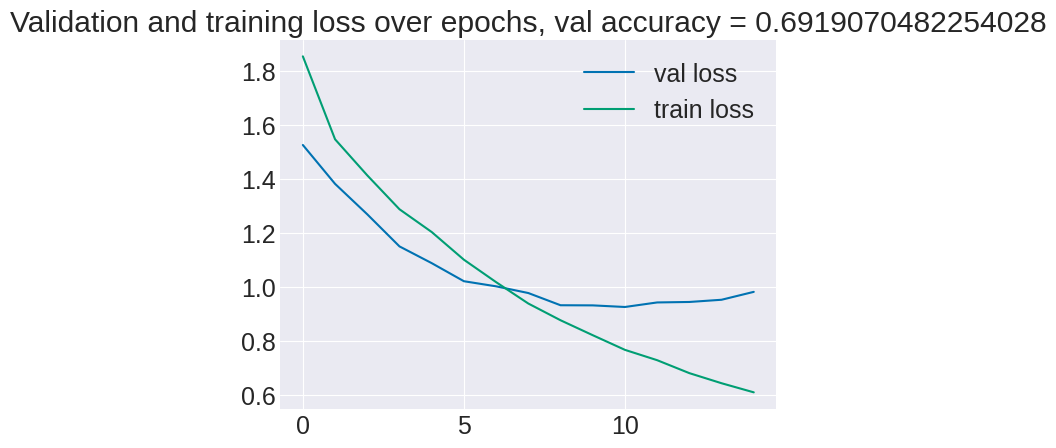

In [20]:
plt.plot(np.array(val_loss_hist), label = 'val loss')
plt.plot(np.array(train_loss_hist), label = 'train loss')
plt.legend()
plt.title(f'Validation and training loss over epochs, val accuracy = {np.array(val_acc_hist)[-1]}')
plt.show()

### 4e. Experiment: Effect of batch size on runtime and accuracy

To develop your intuition about how the choice of batch size generally affects runtime and accuracy on a dataset like CIFAR-10, run an experiment in which fresh `VGG4` nets are trained for `15` epochs with one of the following batch sizes:<br/>
`[128, 256, 512, 1024, 2048]`. After each training run, record the test accuracy and runtime.

Create two plots:
1. The test accuracy (y axis) as a function of the batch size (x axis). There should be 5 markers joined by a single curve.
2. The runtime (y axis) as a function of the batch size (x axis). There should be 5 markers joined by a single curve.

**Note:**
- Your `fit` method prints the runtime per epoch, but in this task you should record the total runtime over training and prediction. (in seconds). To do this, it may make sense to use the time module to record the total time in the notebook cell below.
- You should be running this on the GPU!

In [22]:
import time

In [23]:
# KEEP THIS SEED
acc_list = []
runtime_list = []
batch_sizes = [128, 256, 512, 1024, 2048]
for size in batch_sizes: 
    start_time = time.time()
    tf.random.set_seed(0)
    model = VGG4(10, (32,32,3))
    model.compile()
    train_loss_hist, val_loss_hist, val_acc_hist, e = model.fit(x_train, y_train,x_val, y_val, batch_size = size, max_epochs = 15)
    end_time = time.time()
    runtime_list.append(end_time-start_time)
    test_acc, _ = model.evaluate(x_test,y_test)
    acc_list.append(test_acc)

    

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flat) shape: [1, 16384]
MaxPool2D layer output(maxpool1) shape: [1, 16, 16, 64]
Conv2D layer output(conv2) shape: [1, 32, 32, 64]
Conv2D layer output(conv1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


validation accuracy: 0.44090545177459717
validation loss: 1.531414270401001
the epoch 0 took 6865294276 nanoseconds


validation accuracy: 0.5182291865348816
validation loss: 1.3175125122070312
the epoch 1 took 4969712909 nanoseconds


validation accuracy: 0.5582932829856873
validation loss: 1.2259382009506226
the epoch 2 took 5025224453 nanoseconds


validation accuracy: 0.5991586446762085
validation loss: 1.13435959815979
the epoch 3 took 5028851578 nanoseconds


validation accuracy: 0.620192289352417
validation loss: 1.0705291032791138
the epoch 4 took 5012998376 nanoseconds


validation accuracy: 0.6568509340286255
validation loss: 0.9909437298774719
the epoch 5 took 4996682067 nanoseconds


validation accuracy: 0.6580528616905212
validation loss: 0.977849006652832
the epoch 6 took 5025272246 nanoseconds


validation accuracy: 0.6564503312110901
validation loss: 0.9928908944129944
the epoch 7 took 5050066110 nanoseconds


validation accuracy: 0.6782852411270142
validation loss: 0.9398820400238037
the epoch 8 took 5225492049 nanoseconds


validation accuracy: 0.6804887652397156
validation loss: 0.9674379229545593
the epoch 9 took 5224388513 nanoseconds


validation accuracy: 0.6744791865348816
validation loss: 1.0027199983596802
the epoch 10 took 5163731179 nanoseconds


validation accuracy: 0.6800881624221802
validation loss: 0.9838078618049622
the epoch 11 took 5031562924 nanoseconds


validation accuracy: 0.6830929517745972
validation loss: 0.986370861530304
the epoch 12 took 5064548205 nanoseconds


validation accuracy: 0.6862980723381042
validation loss: 1.0071094036102295
the epoch 13 took 4990819339 nanoseconds


validation accuracy: 0.6820913553237915
validation loss: 1.0282368659973145
the epoch 14 took 5027174575 nanoseconds
Finished training after 15 epochs!


---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flat) shape: [1, 16384]
MaxPool2D layer output(maxpool1) shape: [1, 16, 16, 64]
Conv2D layer output(conv2) shape: [1, 32, 32, 64]
Conv2D layer output(conv1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


validation accuracy: 0.40625
validation loss: 1.6661651134490967
the epoch 0 took 4607814627 nanoseconds


validation accuracy: 0.4611378312110901
validation loss: 1.4716756343841553
the epoch 1 took 2221601209 nanoseconds


validation accuracy: 0.5152243375778198
validation loss: 1.339017629623413
the epoch 2 took 2220030005 nanoseconds


validation accuracy: 0.5496794581413269
validation loss: 1.2479908466339111
the epoch 3 took 2250764692 nanoseconds


validation accuracy: 0.5677083134651184
validation loss: 1.1960291862487793
the epoch 4 took 2216939982 nanoseconds


validation accuracy: 0.6009615659713745
validation loss: 1.1230064630508423
the epoch 5 took 2209076592 nanoseconds


validation accuracy: 0.6213942170143127
validation loss: 1.0620521306991577
the epoch 6 took 2230667856 nanoseconds


validation accuracy: 0.6438301205635071
validation loss: 1.005903959274292
the epoch 7 took 2242878683 nanoseconds


validation accuracy: 0.6528445482254028
validation loss: 0.9657653570175171
the epoch 8 took 2224052117 nanoseconds


validation accuracy: 0.6620593070983887
validation loss: 0.9614359736442566
the epoch 9 took 2226216992 nanoseconds


validation accuracy: 0.6860977411270142
validation loss: 0.9093399047851562
the epoch 10 took 2233438855 nanoseconds


validation accuracy: 0.6836938858032227
validation loss: 0.9163275361061096
the epoch 11 took 2224951954 nanoseconds


validation accuracy: 0.6782852411270142
validation loss: 0.9307870268821716
the epoch 12 took 2229497850 nanoseconds


validation accuracy: 0.6935096383094788
validation loss: 0.901235818862915
the epoch 13 took 2208315170 nanoseconds


validation accuracy: 0.6977163553237915
validation loss: 0.899520754814148
the epoch 14 took 2206687346 nanoseconds
Finished training after 15 epochs!


---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flat) shape: [1, 16384]
MaxPool2D layer output(maxpool1) shape: [1, 16, 16, 64]
Conv2D layer output(conv2) shape: [1, 32, 32, 64]
Conv2D layer output(conv1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


validation accuracy: 0.36638620495796204
validation loss: 1.7711706161499023
the epoch 0 took 5306941839 nanoseconds


validation accuracy: 0.4342948794364929
validation loss: 1.560308575630188
the epoch 1 took 2126765790 nanoseconds


validation accuracy: 0.4795673191547394
validation loss: 1.4458823204040527
the epoch 2 took 2130279114 nanoseconds


validation accuracy: 0.5016025900840759
validation loss: 1.3736802339553833
the epoch 3 took 2139725455 nanoseconds


validation accuracy: 0.5308493375778198
validation loss: 1.2981618642807007
the epoch 4 took 2128501102 nanoseconds


validation accuracy: 0.5727163553237915
validation loss: 1.21963632106781
the epoch 5 took 2124289723 nanoseconds


validation accuracy: 0.590745210647583
validation loss: 1.1559360027313232
the epoch 6 took 2131407528 nanoseconds


validation accuracy: 0.6105769276618958
validation loss: 1.1079890727996826
the epoch 7 took 2150441812 nanoseconds


validation accuracy: 0.6199919581413269
validation loss: 1.0805264711380005
the epoch 8 took 2124645970 nanoseconds


validation accuracy: 0.6243990659713745
validation loss: 1.0506620407104492
the epoch 9 took 2127095136 nanoseconds


validation accuracy: 0.6348156929016113
validation loss: 1.0132954120635986
the epoch 10 took 2126498196 nanoseconds


validation accuracy: 0.6484375
validation loss: 1.0046967267990112
the epoch 11 took 2127272704 nanoseconds


validation accuracy: 0.6522436141967773
validation loss: 0.9824373126029968
the epoch 12 took 2129140447 nanoseconds


validation accuracy: 0.6658653616905212
validation loss: 0.9557133913040161
the epoch 13 took 2138482053 nanoseconds


validation accuracy: 0.6734775900840759
validation loss: 0.9351815581321716
the epoch 14 took 2124171503 nanoseconds
Finished training after 15 epochs!


---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flat) shape: [1, 16384]
MaxPool2D layer output(maxpool1) shape: [1, 16, 16, 64]
Conv2D layer output(conv2) shape: [1, 32, 32, 64]
Conv2D layer output(conv1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


validation accuracy: 0.31390222907066345
validation loss: 1.892077088356018
the epoch 0 took 6990970953 nanoseconds


validation accuracy: 0.39262819290161133
validation loss: 1.7085604667663574
the epoch 1 took 2100326233 nanoseconds


validation accuracy: 0.43068909645080566
validation loss: 1.5824254751205444
the epoch 2 took 2111933379 nanoseconds


validation accuracy: 0.4709535241127014
validation loss: 1.4773006439208984
the epoch 3 took 2110358305 nanoseconds


validation accuracy: 0.49819710850715637
validation loss: 1.4021075963974
the epoch 4 took 2116447343 nanoseconds


validation accuracy: 0.5196313858032227
validation loss: 1.3617048263549805
the epoch 5 took 2116738677 nanoseconds


validation accuracy: 0.5364583134651184
validation loss: 1.3015755414962769
the epoch 6 took 2115667654 nanoseconds


validation accuracy: 0.5522836446762085
validation loss: 1.257516622543335
the epoch 7 took 2113265789 nanoseconds


validation accuracy: 0.5735176205635071
validation loss: 1.2247774600982666
the epoch 8 took 2117841419 nanoseconds


validation accuracy: 0.5817307829856873
validation loss: 1.1866486072540283
the epoch 9 took 2113115778 nanoseconds


validation accuracy: 0.5973557829856873
validation loss: 1.1452287435531616
the epoch 10 took 2119816765 nanoseconds


validation accuracy: 0.6057692170143127
validation loss: 1.1057218313217163
the epoch 11 took 2122176358 nanoseconds


validation accuracy: 0.6097756624221802
validation loss: 1.08716881275177
the epoch 12 took 2122686579 nanoseconds


validation accuracy: 0.6292067170143127
validation loss: 1.057953119277954
the epoch 13 took 2122114030 nanoseconds


validation accuracy: 0.6386218070983887
validation loss: 1.0335811376571655
the epoch 14 took 2114048548 nanoseconds
Finished training after 15 epochs!


---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flat) shape: [1, 16384]
MaxPool2D layer output(maxpool1) shape: [1, 16, 16, 64]
Conv2D layer output(conv2) shape: [1, 32, 32, 64]
Conv2D layer output(conv1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


validation accuracy: 0.23737980425357819
validation loss: 2.0886330604553223
the epoch 0 took 8930942109 nanoseconds


validation accuracy: 0.32732370495796204
validation loss: 1.8581349849700928
the epoch 1 took 2108955701 nanoseconds


validation accuracy: 0.3752003312110901
validation loss: 1.7262390851974487
the epoch 2 took 2107346600 nanoseconds


validation accuracy: 0.41786858439445496
validation loss: 1.6381449699401855
the epoch 3 took 2106493057 nanoseconds


validation accuracy: 0.4403044879436493
validation loss: 1.585460901260376
the epoch 4 took 2102477500 nanoseconds


validation accuracy: 0.45452722907066345
validation loss: 1.5265532732009888
the epoch 5 took 2109288914 nanoseconds


validation accuracy: 0.4787660241127014
validation loss: 1.49467933177948
the epoch 6 took 2112247355 nanoseconds


validation accuracy: 0.48818108439445496
validation loss: 1.441305160522461
the epoch 7 took 2106252202 nanoseconds


validation accuracy: 0.510817289352417
validation loss: 1.389009952545166
the epoch 8 took 2119607779 nanoseconds


validation accuracy: 0.5146234035491943
validation loss: 1.3509633541107178
the epoch 9 took 2107478722 nanoseconds


validation accuracy: 0.5396634340286255
validation loss: 1.2953648567199707
the epoch 10 took 2111873663 nanoseconds


validation accuracy: 0.5524839758872986
validation loss: 1.2524675130844116
the epoch 11 took 2113165740 nanoseconds


validation accuracy: 0.5622996687889099
validation loss: 1.2193259000778198
the epoch 12 took 2112188636 nanoseconds


validation accuracy: 0.581129789352417
validation loss: 1.1839262247085571
the epoch 13 took 2124983095 nanoseconds


validation accuracy: 0.5867387652397156
validation loss: 1.154367446899414
the epoch 14 took 2105603688 nanoseconds
Finished training after 15 epochs!


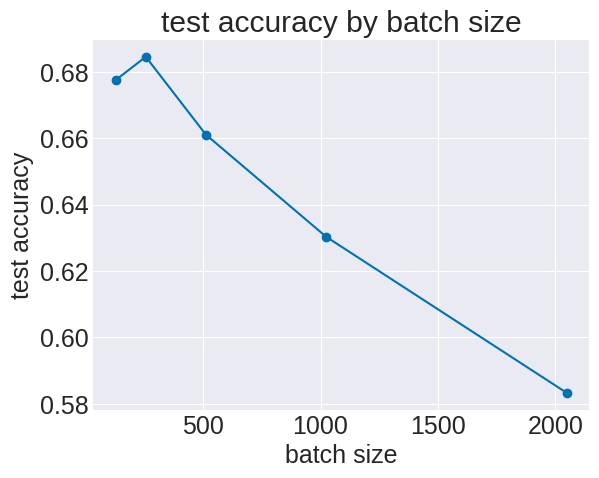

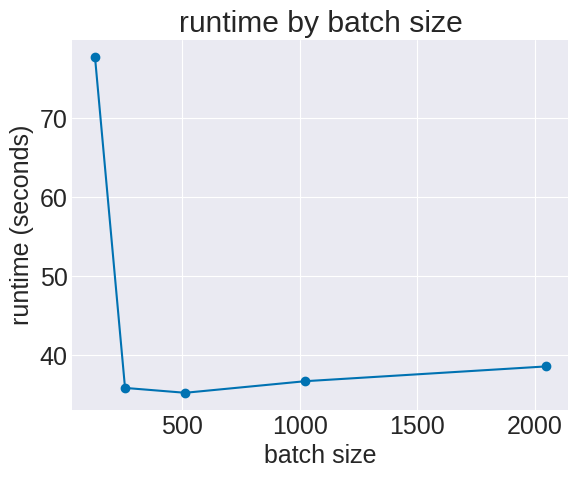

In [26]:
#The test accuracy (y axis) as a function of the batch size (x axis). There should be 5 markers joined by a single curve.
plt.plot(batch_sizes, acc_list, marker = 'o')
plt.xlabel('batch size')
plt.ylabel('test accuracy')
plt.title("test accuracy by batch size")
plt.show()

#The runtime (y axis) as a function of the batch size (x axis). There should be 5 markers joined by a single curve.
plt.plot(batch_sizes, runtime_list, marker = 'o')
plt.xlabel('batch size')
plt.ylabel('runtime (seconds)')
plt.title("runtime by batch size")
plt.show()


### 4f. Questions

**Question 2:** What do the plots suggest to you about the relationship between batch size and accuracy? Please be specific,citing evidence from your plots.

**Question 3:** Do you find this relationship surprising? Why or why not?

**Answer 2:** 
It seems that the smaller the batch size, the better accuracy we shoudl get. However, when the batch size is too small we will get worse performance.  This suggests that with a sufficiently large subsample, we should see the best performance when updating our weights more often (smaller batches mean more weight updates per epoch)

**Answer 3:**  I am not surprised at all by this relationship, I think if we ran the larger batch sizes for more epochs so that the number of weight updates was identical, they would perform similarly.  When we have samples of 100-200, it makes sense that the sample should be reasonably large.  If the batches weren't randomly distributed among classes, I would expect small batch sizees to do much worse.